# Biodiversity in National Parks

## Project Goals:

- Clean up the data:
    - [x] ~~Examine data~~
    - [x] ~~Determine what to do with missing data~~
    - [x] ~~Examine and remove duplicate values~~
- Explore the data:
    - [x] ~~Bar graph of number of species for each category~~
    - [x] ~~Bar graph of number of species for each conservation status~~
    - [x] ~~Array of bar graphs of number of species for each category, one graph for each conservation status~~
    - [x] ~~Array of bar graphs of number of species for each conservation status, one graph for each category~~
    - [x] ~~Box plot of total number of observations in each park~~
    - [x] ~~Box plot of total number of observations for each conservation status~~
    - [x] ~~Grouped box plot of observations in each park, grouped by conservation status~~
    - [x] ~~Grouped box plot of observations for each conservation status, grouped by park~~
    - [ ] Histograms of mean number of observations across parks (one histogram per conservation status)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [2]:
# Examine 'species_info' DataFrame:
print(species_info.info())
print('\n')
print('Null count:\n')
print(species_info.isna().sum())
print('\n')
print('Number of unique values:\n')
print(species_info.nunique())
print('\n')
print('Unique conservation_status values:\n')
print(species_info.conservation_status.unique())

species_info.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


Null count:

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


Number of unique values:

category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64


Unique conservation_status values:

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [3]:
# Examine 'observations' DataFrame
print(observations.info())
print('\n')
print('Null count:\n')
print(observations.isna().sum())
print('\n')
print('Number of unique values:\n')
print(observations.nunique())
print('\n')
print('Unique park_name values:\n')
print(observations.park_name.unique())
observations.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


Null count:

scientific_name    0
park_name          0
observations       0
dtype: int64


Number of unique values:

scientific_name    5541
park_name             4
observations        304
dtype: int64


Unique park_name values:

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [5]:
# Replace NaN values in species_info.conservation_status with 'Least Concern'
species_info.fillna(value='Least Concern', inplace=True)
species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Least Concern
1,Mammal,Bos bison,"American Bison, Bison",Least Concern
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Least Concern
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Least Concern
4,Mammal,Cervus elaphus,Wapiti Or Elk,Least Concern
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Least Concern
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Least Concern
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [6]:
# Deal with cases of duplicate scientific_name values:

# Drop cases where the scientific_name, conservation_status, and category is the same 
# (we don't really care about common_names, since it won't be used with the observations DataFrame)
species_info.drop_duplicates(subset=['scientific_name', 'conservation_status', 'category'], inplace=True)

# Find cases where the scientific_name is the same but the conservation_status or category is different
# (these rows will not have been dropped by the statement above)
different_conservation_status = species_info[species_info.duplicated(subset='scientific_name',keep=False)]
different_conservation_status

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
560,Fish,Oncorhynchus mykiss,Rainbow Trout,Least Concern
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened


In [7]:
# There are two scientific_names that have rows with different conservation_status values (see above)

# For Canis lupus (Gray Wolf), Wikipedia lists it as 'Least Concern' on the IUCN system. 
# It seems that wolf populations have been making a comeback after the Endangered Species Act of 1973. 
# See https://en.wikipedia.org/wiki/Wolf#Status_and_conservation
# So, let's keep the row listing the wolf as 'In Recovery', and remove the row listing it as 'Endangered':
species_info.drop(index=8, inplace=True)

# For Oncorhynchus mykiss (Rainbow Trout), Wikipedia lists it as 'Secure' on the NatureServe system.
# But it seems that there are some federal/state agencies that classify the Rainbow Trout as endangered/threatened.
# See https://en.wikipedia.org/wiki/Rainbow_trout#Conservation
# To be on the cautious side, let's keep the row listing the rainbow trout as 'Threatened', and remove the row
# listing it as 'Least Concern':
species_info.drop(index=560, inplace=True)

unique_species = pd.DataFrame()
unique_species['scientific_name'] = species_info.scientific_name
unique_species['category'] = species_info.category
unique_species['conservation_status'] = species_info.conservation_status

# Test to see whether there are any duplicate scientific_name values remaining:
species_info[species_info.duplicated(subset='scientific_name',keep=False)]

,category,scientific_name,common_names,conservation_status


In [8]:
# Left join species_info and observations:
df = pd.merge(observations, species_info, how='left')
df

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Least Concern
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Least Concern
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Least Concern
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Least Concern
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Least Concern
...,...,...,...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173,Vascular Plant,Prairie Tea,Least Concern
23292,Otospermophilus beecheyi,Bryce National Park,130,Mammal,California Ground Squirrel,Least Concern
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140,Vascular Plant,Sessileflower False Goldenaster,Least Concern
23294,Dicranella rufescens,Yosemite National Park,171,Nonvascular Plant,Dicranella Moss,Least Concern


In [9]:
df.describe(include='all')

,scientific_name,park_name,observations,category,common_names,conservation_status
count,23296,23296,23296.000000,23296,23296,23296
unique,5541,4,NaN,7,5229,5
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN,Vascular Plant,Brachythecium Moss,Least Concern
freq,12,5824,NaN,17880,28,22528
mean,NaN,NaN,142.287904,NaN,NaN,NaN
std,NaN,NaN,69.890532,NaN,NaN,NaN
min,NaN,NaN,9.000000,NaN,NaN,NaN
25%,NaN,NaN,86.000000,NaN,NaN,NaN
50%,NaN,NaN,124.000000,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,NaN,NaN


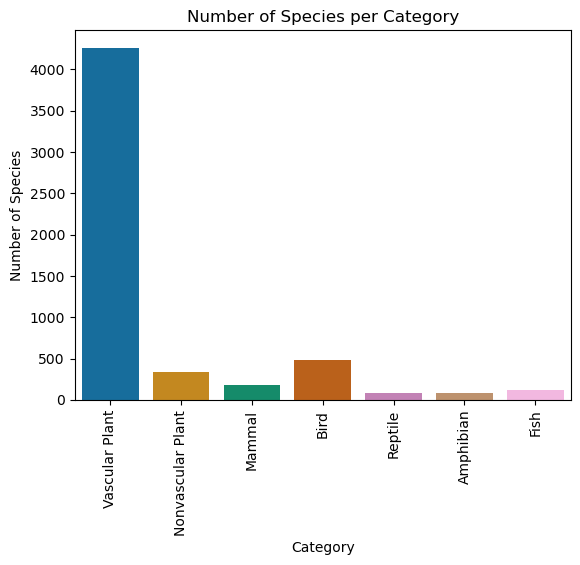

<Figure size 640x480 with 0 Axes>

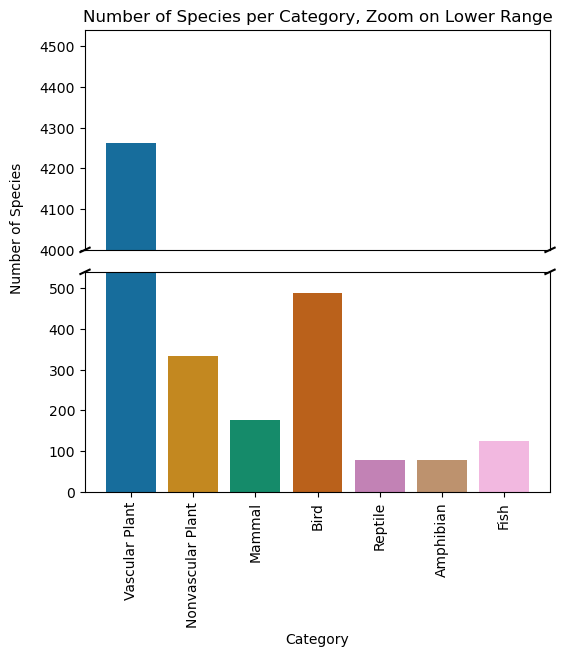

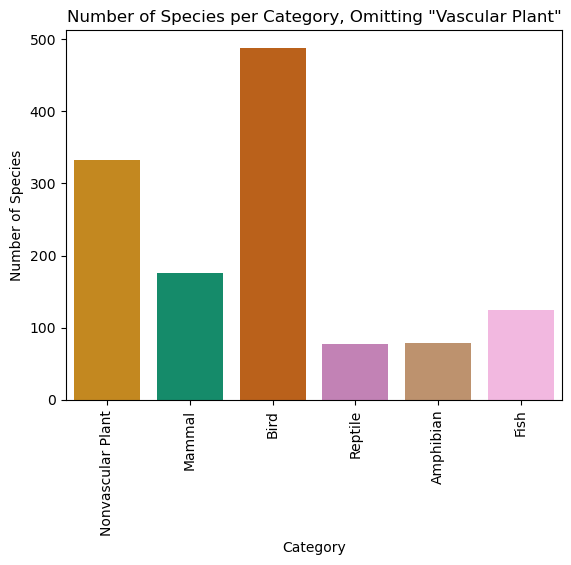

<Figure size 640x480 with 0 Axes>

In [10]:
category_order = ['Vascular Plant', 'Nonvascular Plant', 'Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish']
pal = sns.color_palette('colorblind')

# Plot distribution of species over different categories
sns.countplot(x='category', data=unique_species, order=category_order, palette=pal)
plt.title('Number of Species per Category')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=90, fontsize=10)
plt.show()
plt.clf()

# Repeat previous plot, but zoom in on lower region:
# Following https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(6,6))
ax1 = sns.countplot(x='category', data=unique_species, order = category_order, palette=pal, ax=ax1)
ax2 = sns.countplot(x='category', data=unique_species, order = category_order, palette=pal, ax=ax2)
ax1.set_ylim(4000, 4540)
ax2.set_ylim(0, 540)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("")
ax2.set_ylabel("")
fig.text(0.00, 0.55, "Number of Species", va="center", rotation="vertical")
fig.subplots_adjust(hspace=0.1)
ax1.set_title('Number of Species per Category, Zoom on Lower Range')
ax2.set_xlabel('Category')
plt.xticks(rotation=90, fontsize=10)
diag = .01  # how big to make the diagonal lines in axes coordinates
ax1.plot((-diag, +diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-left diagonal
ax1.plot((1 - diag, 1 + diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-right diagonal
ax2.plot((-diag, +diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-left diagonal
ax2.plot((1 - diag, 1 + diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-right diagonal
plt.show()
plt.clf()

# Repeat previous plot, but omit 'Vascular Plant' category
sns.countplot(x='category', data=unique_species[-(unique_species.category == 'Vascular Plant')], order=category_order[1:], palette=pal[1:])
plt.title('Number of Species per Category, Omitting "Vascular Plant"')
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.xticks(rotation=90, fontsize=10)
plt.show()
plt.clf()

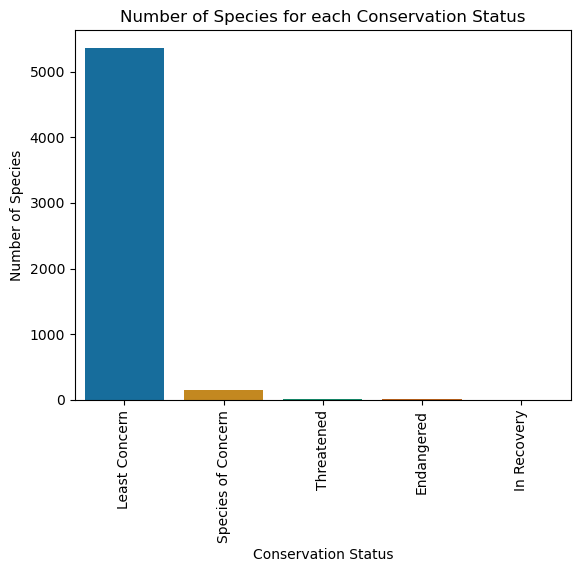

<Figure size 640x480 with 0 Axes>

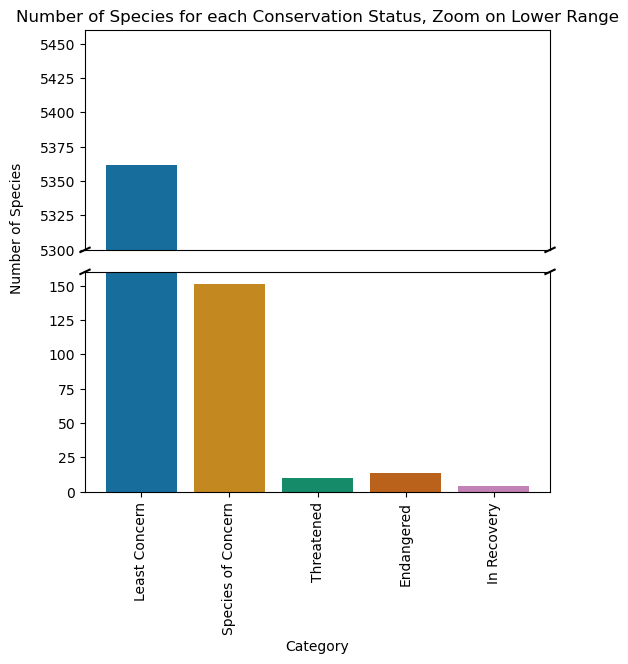

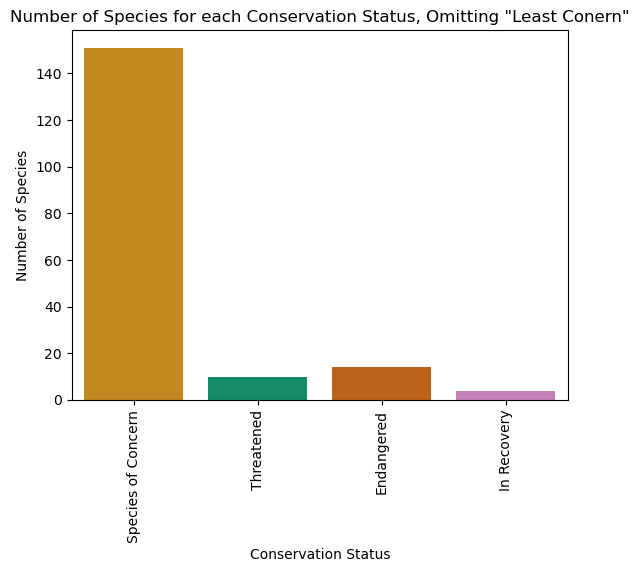

<Figure size 640x480 with 0 Axes>

In [11]:
conservation_order = ['Least Concern', 'Species of Concern', 'Threatened', 'Endangered', 'In Recovery']

# Plot distribution of species over different conservation statuses
sns.countplot(x='conservation_status', data=unique_species, order=conservation_order, palette=pal)
plt.title('Number of Species for each Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=90, fontsize=10)
plt.show()
plt.clf()


# Repeat previous plot, but zoom in on lower region:
# Following https://gist.github.com/pfandzelter/0ae861f0dee1fb4fd1d11344e3f85c9e
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(6,6))
ax1 = sns.countplot(x='conservation_status', data=unique_species, order = conservation_order, palette=pal, ax=ax1)
ax2 = sns.countplot(x='conservation_status', data=unique_species, order = conservation_order, palette=pal, ax=ax2)
ax1.set_ylim(5300, 5460)
ax2.set_ylim(0, 160)
ax1.get_xaxis().set_visible(False)
ax1.set_ylabel("")
ax2.set_ylabel("")
fig.text(0.00, 0.55, "Number of Species", va="center", rotation="vertical")
fig.subplots_adjust(hspace=0.1)
ax1.set_title('Number of Species for each Conservation Status, Zoom on Lower Range')
ax2.set_xlabel('Category')
plt.xticks(rotation=90, fontsize=10)
diag = .01  # how big to make the diagonal lines in axes coordinates
ax1.plot((-diag, +diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-left diagonal
ax1.plot((1 - diag, 1 + diag), (-diag, +diag), transform=ax1.transAxes, color="k", clip_on=False) # top-right diagonal
ax2.plot((-diag, +diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-left diagonal
ax2.plot((1 - diag, 1 + diag), (1 - diag, 1 + diag), transform=ax2.transAxes, color="k", clip_on=False)  # bottom-right diagonal
plt.show()
plt.clf()


# Repeat previous plot, but omit 'Least Concern' conservation status
sns.countplot(x='conservation_status', data=unique_species[-(unique_species.conservation_status == 'Least Concern')], order=conservation_order[1:], palette=pal[1:])
plt.title('Number of Species for each Conservation Status, Omitting "Least Conern"')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.xticks(rotation=90, fontsize=10)
plt.show()
plt.clf()

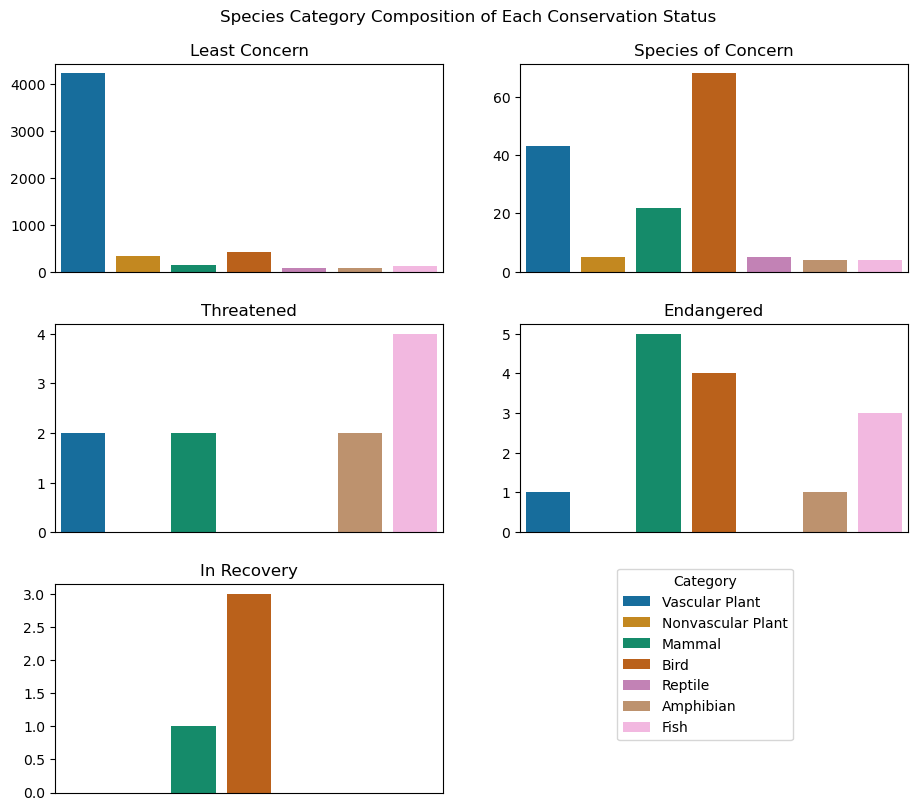

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot an array of bar graphs of number of species for each category, one graph for each conservation status
fig, axs = plt.subplots(3, 2, figsize=(11, 9))
fig.suptitle('Species Category Composition of Each Conservation Status')

sns.countplot(ax=axs[0][0], x='category', data=unique_species[unique_species.conservation_status == 'Least Concern'], order=category_order, palette=pal)
axs[0][0].set_title('Least Concern')
sns.countplot(ax=axs[0][1], x='category', data=unique_species[unique_species.conservation_status == 'Species of Concern'], order=category_order, palette=pal)
axs[0][1].set_title('Species of Concern')
sns.countplot(ax=axs[1][0], x='category', data=unique_species[unique_species.conservation_status == 'Threatened'], order=category_order, palette=pal)
axs[1][0].set_title('Threatened')
sns.countplot(ax=axs[1][1], x='category', data=unique_species[unique_species.conservation_status == 'Endangered'], order=category_order, palette=pal)
axs[1][1].set_title('Endangered')
sns.countplot(ax=axs[2][0], x='category', data=unique_species[unique_species.conservation_status == 'In Recovery'], order=category_order, palette=pal)
axs[2][0].set_title('In Recovery')

sns.countplot(ax=axs[2][1], x='category', dodge=False, hue='category', data=unique_species[unique_species.conservation_status == 'Least Concern'], order=category_order, palette=pal)
axs[2][1].legend(loc=(0.25, 0.25), labels=category_order, title="Category")
axs[2][1].set_axis_off()
axs[2][1].set_xlim(1000, 2000)

for i in range(3): # row number
    for j in range(2): # column number
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")
        axs[i][j].get_xaxis().set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace=0.25, top=0.92)
plt.show()
plt.clf()

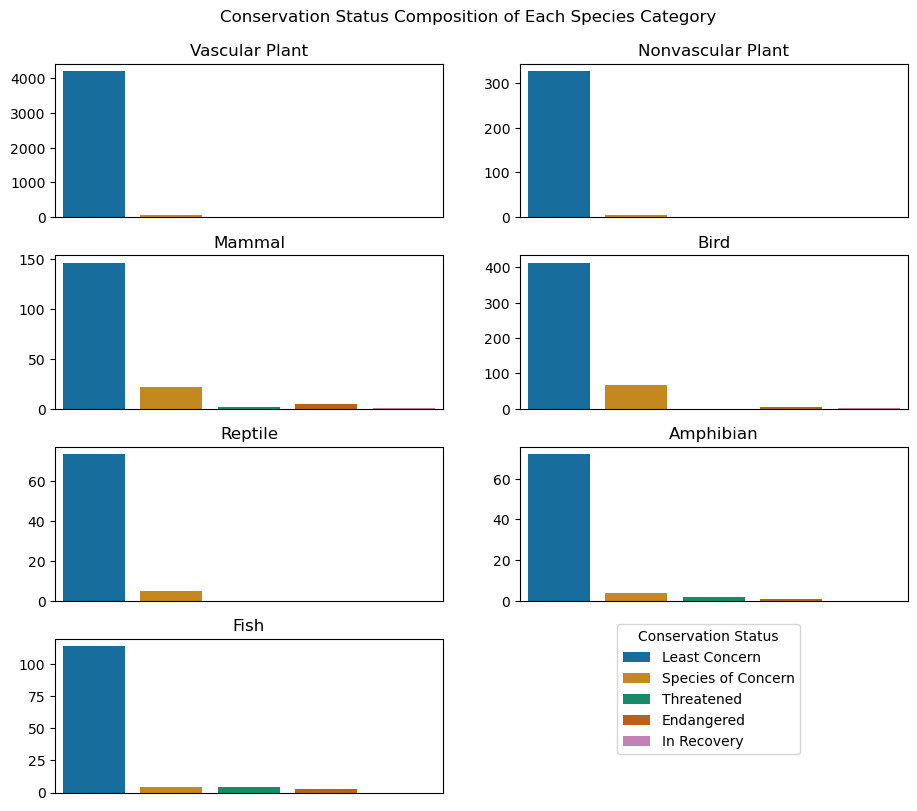

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot an array of bar graphs of number of species for each conservation status, one graph for each species category
fig, axs = plt.subplots(4, 2, figsize=(11, 9))
fig.suptitle('Conservation Status Composition of Each Species Category')

sns.countplot(ax=axs[0][0], x='conservation_status', data=unique_species[unique_species.category == 'Vascular Plant'], order=conservation_order, palette=pal)
axs[0][0].set_title('Vascular Plant')
sns.countplot(ax=axs[0][1], x='conservation_status', data=unique_species[unique_species.category == 'Nonvascular Plant'], order=conservation_order, palette=pal)
axs[0][1].set_title('Nonvascular Plant')
sns.countplot(ax=axs[1][0], x='conservation_status', data=unique_species[unique_species.category == 'Mammal'], order=conservation_order, palette=pal)
axs[1][0].set_title('Mammal')
sns.countplot(ax=axs[1][1], x='conservation_status', data=unique_species[unique_species.category == 'Bird'], order=conservation_order, palette=pal)
axs[1][1].set_title('Bird')
sns.countplot(ax=axs[2][0], x='conservation_status', data=unique_species[unique_species.category == 'Reptile'], order=conservation_order, palette=pal)
axs[2][0].set_title('Reptile')
sns.countplot(ax=axs[2][1], x='conservation_status', data=unique_species[unique_species.category == 'Amphibian'], order=conservation_order, palette=pal)
axs[2][1].set_title('Amphibian')
sns.countplot(ax=axs[3][0], x='conservation_status', data=unique_species[unique_species.category == 'Fish'], order=conservation_order, palette=pal)
axs[3][0].set_title('Fish')

sns.countplot(ax=axs[3][1], x='conservation_status', dodge=False, hue='conservation_status', data=unique_species[unique_species.category == 'Mammal'], order=conservation_order, palette=pal)
axs[3][1].legend(loc=(0.25, 0.25), labels=conservation_order, title="Conservation Status")
axs[3][1].set_axis_off()
axs[3][1].set_xlim(1000, 2000)

for i in range(4): # row number
    for j in range(2): # column number
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")
        axs[i][j].get_xaxis().set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace=0.25, top=0.92)
plt.show()
plt.clf()

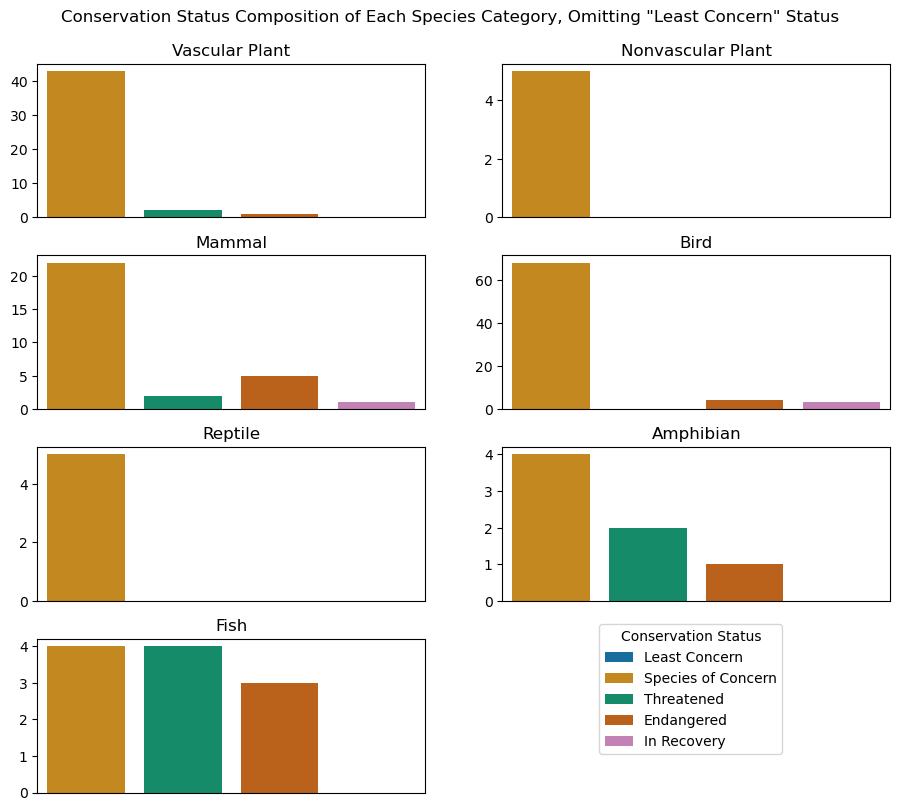

<Figure size 640x480 with 0 Axes>

In [14]:
# Repeat of previous graphs, but omitting 'Least Concern' conservation status
fig, axs = plt.subplots(4, 2, figsize=(11, 9))
fig.suptitle('Conservation Status Composition of Each Species Category, Omitting "Least Concern" Status')

sns.countplot(ax=axs[0][0], x='conservation_status', data=unique_species[(unique_species.category == 'Vascular Plant') & (unique_species.conservation_status != 'Least Concern')], order=conservation_order[1:], palette=pal[1:])
axs[0][0].set_title('Vascular Plant')
sns.countplot(ax=axs[0][1], x='conservation_status', data=unique_species[(unique_species.category == 'Nonvascular Plant') & (unique_species.conservation_status != 'Least Concern')], order=conservation_order[1:], palette=pal[1:])
axs[0][1].set_title('Nonvascular Plant')
sns.countplot(ax=axs[1][0], x='conservation_status', data=unique_species[(unique_species.category == 'Mammal') & (unique_species.conservation_status != 'Least Concern')], order=conservation_order[1:], palette=pal[1:])
axs[1][0].set_title('Mammal')
sns.countplot(ax=axs[1][1], x='conservation_status', data=unique_species[(unique_species.category == 'Bird') & (unique_species.conservation_status != 'Least Concern')], order=conservation_order[1:], palette=pal[1:])
axs[1][1].set_title('Bird')
sns.countplot(ax=axs[2][0], x='conservation_status', data=unique_species[(unique_species.category == 'Reptile') & (unique_species.conservation_status != 'Least Concern')], order=conservation_order[1:], palette=pal[1:])
axs[2][0].set_title('Reptile')
sns.countplot(ax=axs[2][1], x='conservation_status', data=unique_species[(unique_species.category == 'Amphibian') & (unique_species.conservation_status != 'Least Concern')], order=conservation_order[1:], palette=pal[1:])
axs[2][1].set_title('Amphibian')
sns.countplot(ax=axs[3][0], x='conservation_status', data=unique_species[(unique_species.category == 'Fish') & (unique_species.conservation_status != 'Least Concern')], order=conservation_order[1:], palette=pal[1:])
axs[3][0].set_title('Fish')

sns.countplot(ax=axs[3][1], x='conservation_status', dodge=False, hue='conservation_status', data=unique_species[unique_species.category == 'Mammal'], order=conservation_order, palette=pal)
axs[3][1].legend(loc=(0.25, 0.25), labels=conservation_order, title="Conservation Status")
axs[3][1].set_axis_off()
axs[3][1].set_xlim(1000, 2000)

for i in range(4): # row number
    for j in range(2): # column number
        axs[i][j].set_xlabel("")
        axs[i][j].set_ylabel("")
        axs[i][j].get_xaxis().set_visible(False)
        
plt.subplots_adjust(wspace=0.2, hspace=0.25, top=0.92)
plt.show()
plt.clf()

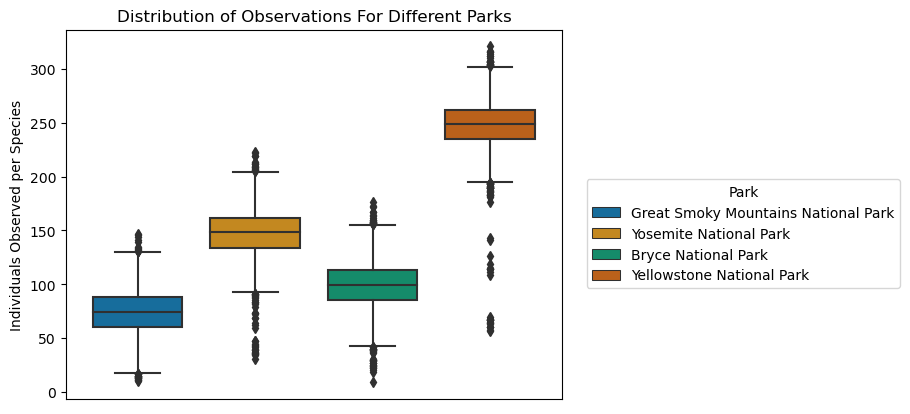

<Figure size 640x480 with 0 Axes>

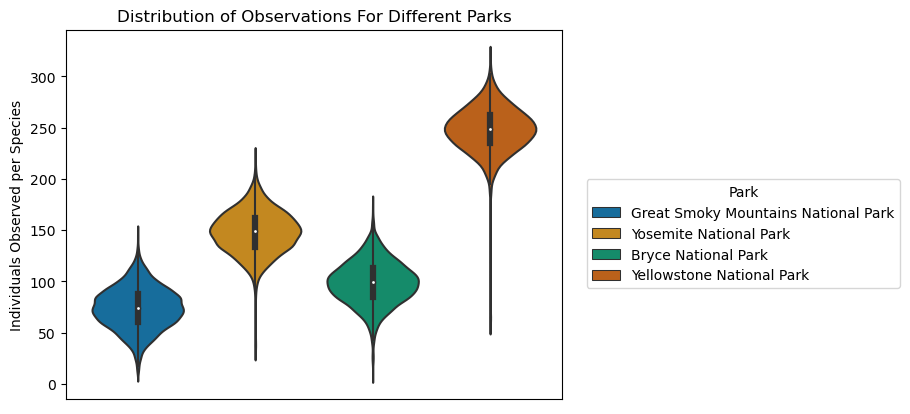

<Figure size 640x480 with 0 Axes>

In [15]:
park_order = ['Great Smoky Mountains National Park','Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']

# Boxplot of total number of observations in each park
fig, ax = plt.subplots()
sns.boxplot(data=df, x='park_name', y='observations', palette=pal, hue='park_name', order=park_order, width=14)
plt.xticks(rotation=90, fontsize=10)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-8,11)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
plt.show()
plt.clf()


# Violin plot of total number of observations in each park
fig, ax = plt.subplots()
sns.violinplot(data=df, x='park_name', y='observations', palette=pal, hue='park_name', order=park_order, width=14)
plt.xticks(rotation=90, fontsize=10)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-8,11)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
plt.show()
plt.clf()

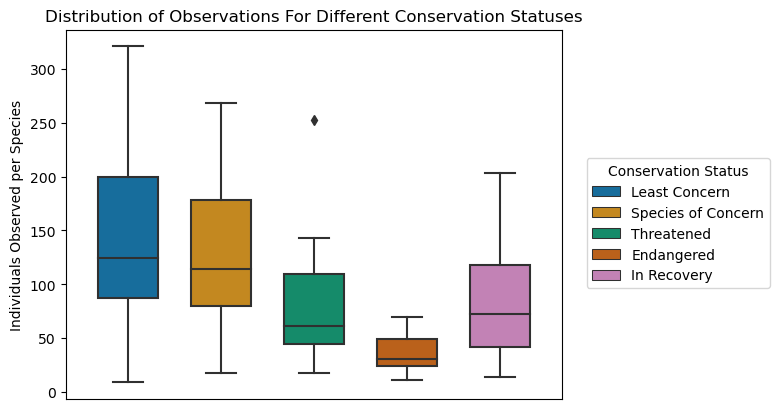

<Figure size 640x480 with 0 Axes>

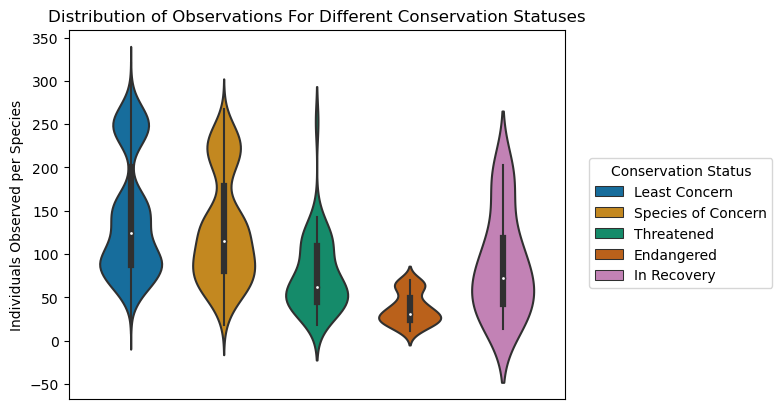

<Figure size 640x480 with 0 Axes>

In [16]:
# Boxplot of total number of observations for each conservation status
fig, ax = plt.subplots()
sns.boxplot(data=df, x='conservation_status', y='observations', palette=pal, hue='conservation_status', order=conservation_order, width=10)
plt.xticks(rotation=90, fontsize=10)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Conservation Statuses')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()


# Violin plot of total number of observations for each conservation status
fig, ax = plt.subplots()
sns.violinplot(data=df, x='conservation_status', y='observations', palette=pal, hue='conservation_status', order=conservation_order, width=10)
plt.xticks(rotation=90, fontsize=10)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-6,10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations For Different Conservation Statuses')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

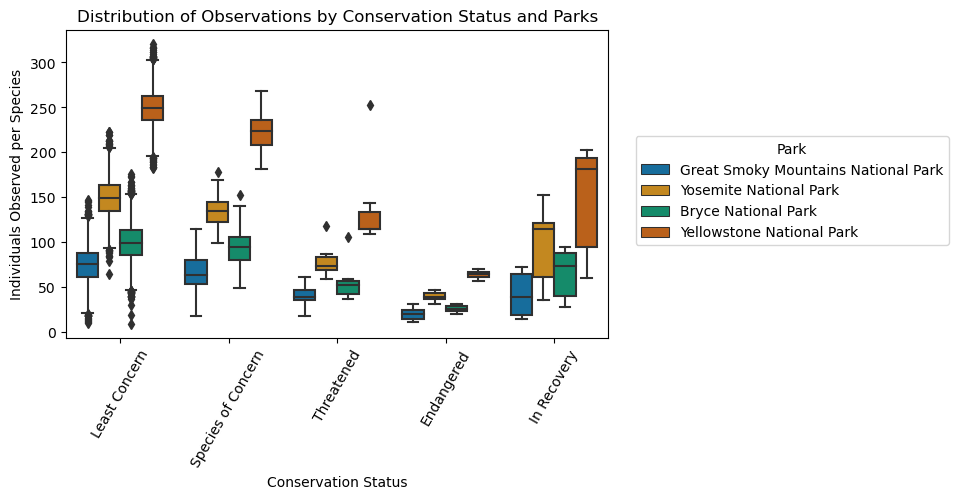

<Figure size 640x480 with 0 Axes>

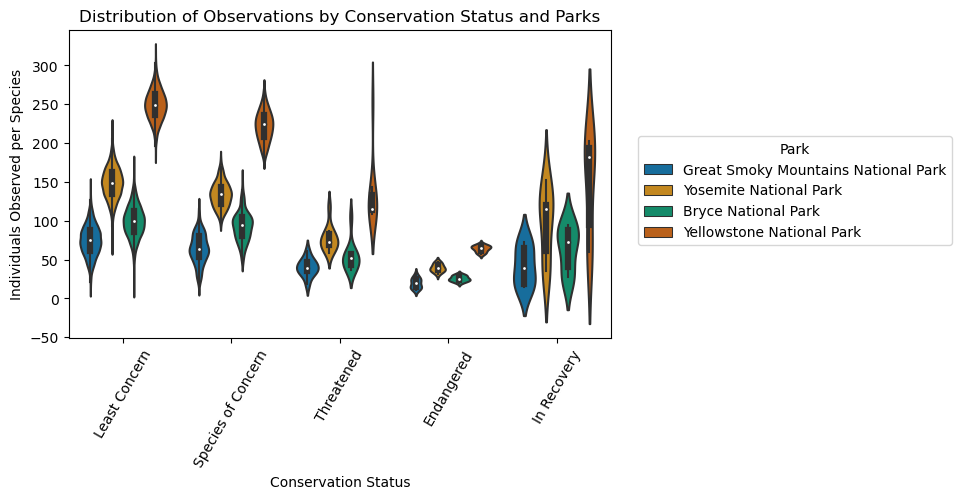

<Figure size 640x480 with 0 Axes>

In [17]:
# Grouped box plot of observations in each park, grouped by conservation status
fig, ax = plt.subplots(figsize=(7,4))
sns.boxplot(data=df, x='conservation_status', y='observations', hue='park_name', palette=pal)
plt.xticks(rotation=60, fontsize=10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
plt.show()
plt.clf()

# Grouped violin plot of observations in each park, grouped by conservation status
fig, ax = plt.subplots(figsize=(7,4))
sns.violinplot(data=df, x='conservation_status', y='observations', hue='park_name', palette=pal)
plt.xticks(rotation=60, fontsize=10)
plt.xlabel('Conservation Status')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Park', loc=(1.05, 0.3))
plt.show()
plt.clf()

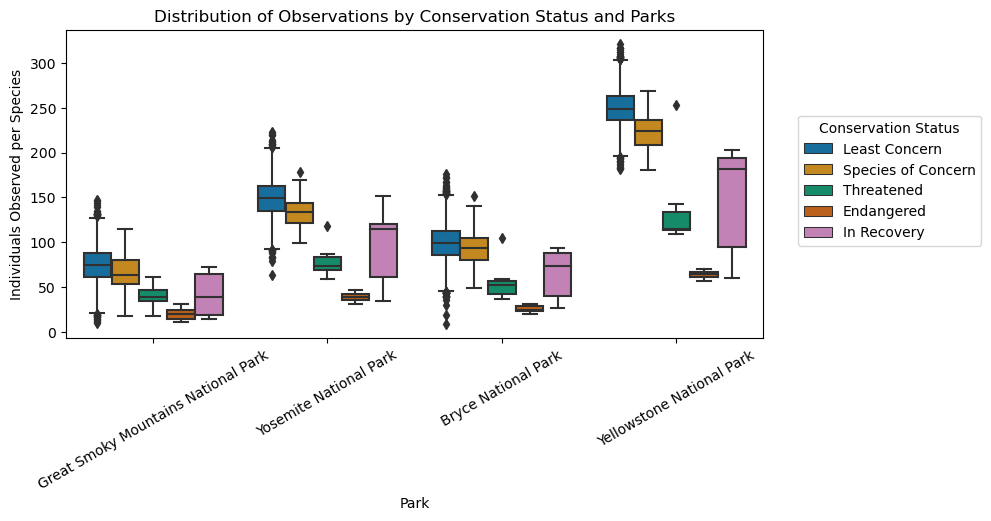

<Figure size 640x480 with 0 Axes>

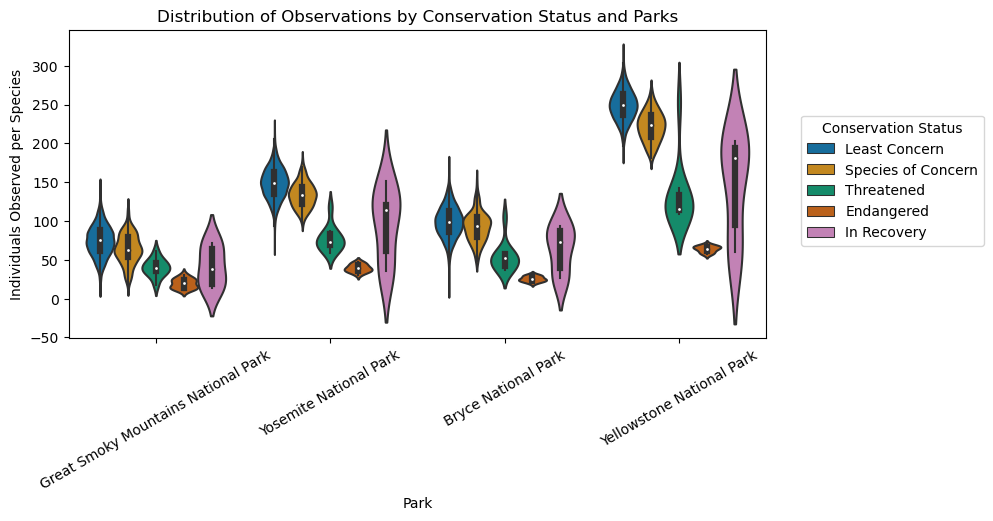

<Figure size 640x480 with 0 Axes>

In [18]:
# Grouped box plot of observations for each conservation status, grouped by park
fig, ax = plt.subplots(figsize=(9,4))
sns.boxplot(data=df, x='park_name', y='observations', hue='conservation_status', palette=pal)
plt.xticks(rotation=30, fontsize=10)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

# Grouped violin plot of observations for each conservation status, grouped by park
fig, ax = plt.subplots(figsize=(9,4))
sns.violinplot(data=df, x='park_name', y='observations', hue='conservation_status', palette=pal, scale='width')
plt.xticks(rotation=30, fontsize=10)
plt.xlabel('Park')
plt.ylabel('Individuals Observed per Species')
plt.title('Distribution of Observations by Conservation Status and Parks')
ax.legend(title='Conservation Status', loc=(1.05, 0.3))
plt.show()
plt.clf()

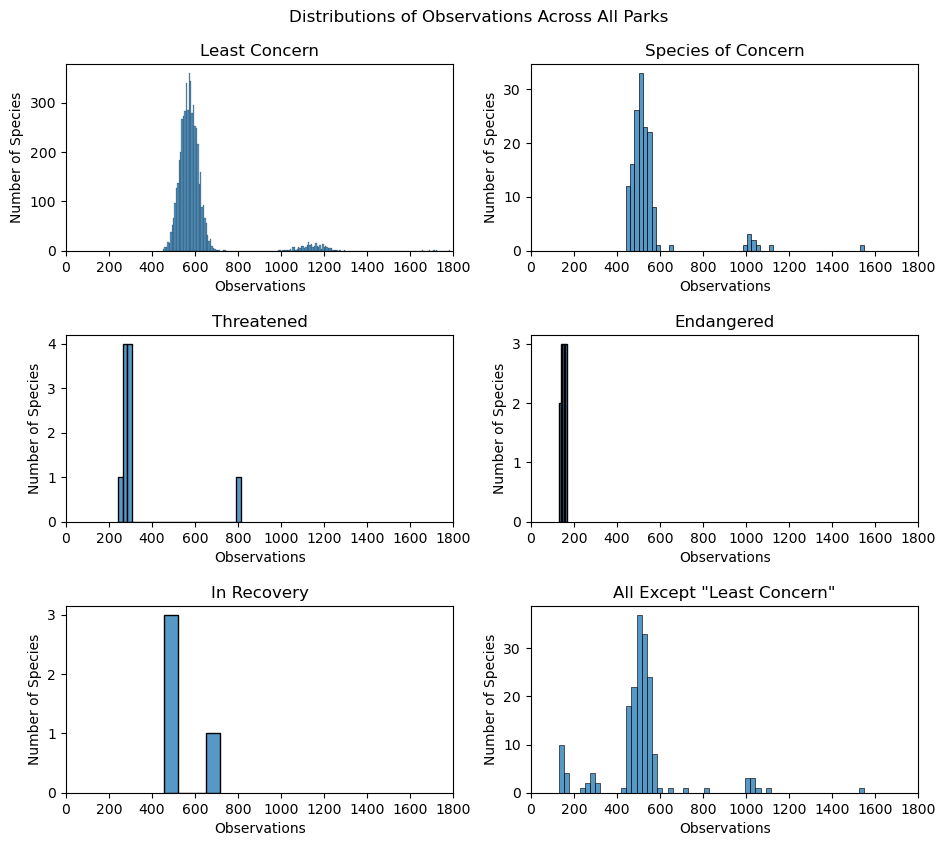

<Figure size 640x480 with 0 Axes>

In [90]:
# Histograms of mean number of observations across parks (one histogram per conservation status)
total_observations = df.groupby(['scientific_name', 'conservation_status']).observations.sum().reset_index()

obs_range = [total_observations.observations.min(), total_observations.observations.max()]
#print(obs_range)
obs_range = [0, 1800]

fig, axs = plt.subplots(3, 2, figsize=(11, 9))
fig.suptitle('Distributions of Observations Across All Parks')

sns.histplot(ax=axs[0][0], x='observations', data=total_observations[total_observations.conservation_status == 'Least Concern'], palette=pal)
axs[0][0].set_title('Least Concern')
axs[0][0].set_xlabel('Observations')
axs[0][0].set_ylabel('Number of Species')
axs[0][0].set_xlim(obs_range)

sns.histplot(ax=axs[0][1], x='observations', data=total_observations[total_observations.conservation_status == 'Species of Concern'], palette=pal)
axs[0][1].set_title('Species of Concern')
axs[0][1].set_xlabel('Observations')
axs[0][1].set_ylabel('Number of Species')
axs[0][1].set_xlim(obs_range)

sns.histplot(ax=axs[1][0], x='observations', data=total_observations[total_observations.conservation_status == 'Threatened'], palette=pal)
axs[1][0].set_title('Threatened')
axs[1][0].set_xlabel('Observations')
axs[1][0].set_ylabel('Number of Species')
axs[1][0].set_xlim(obs_range)

sns.histplot(ax=axs[1][1], x='observations', data=total_observations[total_observations.conservation_status == 'Endangered'], palette=pal)
axs[1][1].set_title('Endangered')
axs[1][1].set_xlabel('Observations')
axs[1][1].set_ylabel('Number of Species')
axs[1][1].set_xlim(obs_range)

sns.histplot(ax=axs[2][0], x='observations', data=total_observations[total_observations.conservation_status == 'In Recovery'], palette=pal)
axs[2][0].set_title('In Recovery')
axs[2][0].set_xlabel('Observations')
axs[2][0].set_ylabel('Number of Species')
axs[2][0].set_xlim(obs_range)

sns.histplot(ax=axs[2][1], x='observations', data=total_observations[total_observations.conservation_status != 'Least Concern'], palette=pal)
axs[2][1].set_title('All Except "Least Concern"')
axs[2][1].set_xlabel('Observations')
axs[2][1].set_ylabel('Number of Species')
axs[2][1].set_xlim(obs_range)

plt.subplots_adjust(wspace=0.2, hspace=0.45, top=0.92)
plt.show()
plt.clf()